In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
bank=pd.read_csv('bank-full.csv',sep=';')

In [5]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
bank.shape

(45211, 17)

### checking null values and datatypes

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Checking which attributes have good impact to predict whether the cilent has subscribed a term deposit or not

<Axes: xlabel='y', ylabel='count'>

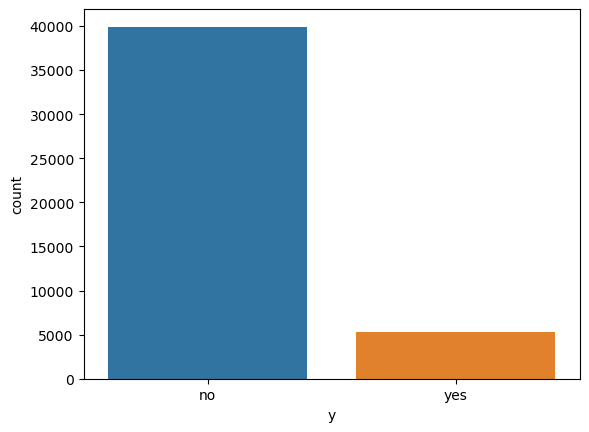

In [11]:
sns.countplot(x='y',data=bank)

Text(0, 0.5, 'Frequency of Purchase')

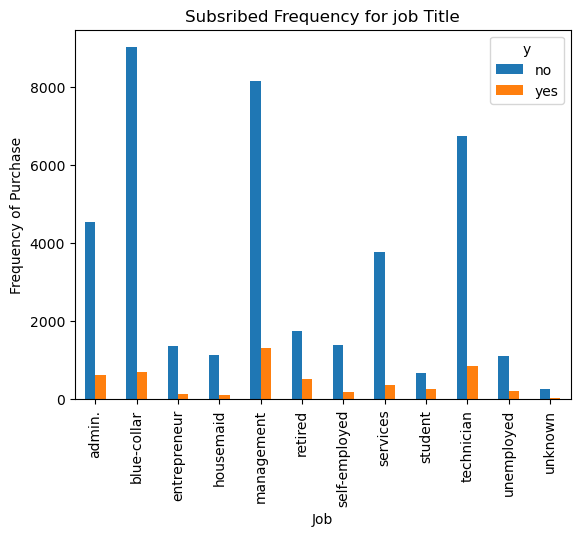

In [13]:
%matplotlib inline
pd.crosstab(bank.job,bank.y).plot(kind='bar')
plt.title("Subsribed Frequency for job Title")
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

### All occupation have different type of subscription so it is import feature

Text(0, 0.5, 'Proportion of Customers')

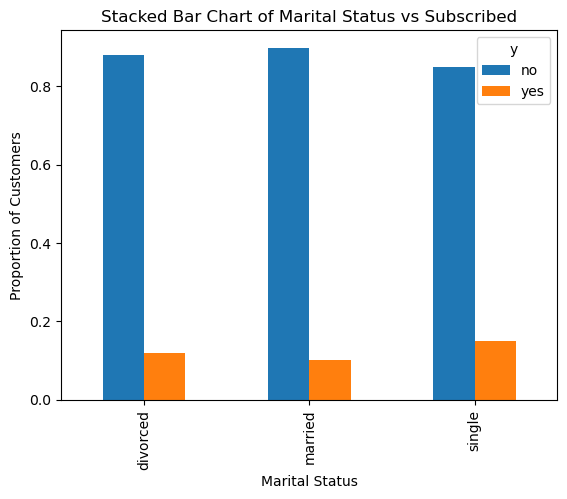

In [14]:
table = pd.crosstab(bank.marital,bank.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked = False)
plt.title('Stacked Bar Chart of Marital Status vs Subscribed')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

### AS per graph we can see all status have same frequency so it is no important feature

Text(0, 0.5, 'Proportion of Customers')

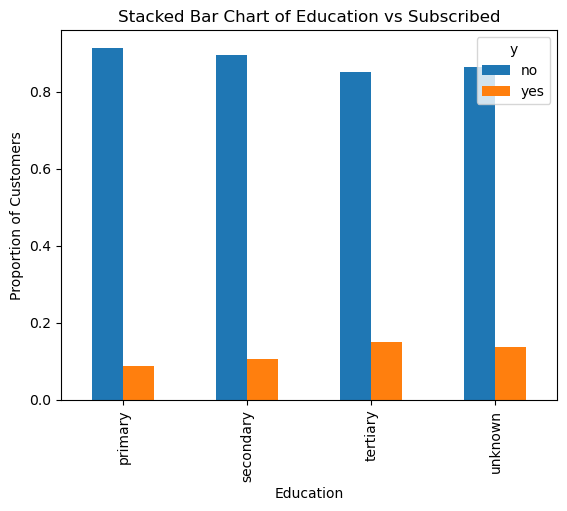

In [15]:
table=pd.crosstab(bank.education,bank.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar')
plt.title('Stacked Bar Chart of Education vs Subscribed')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

<Axes: title={'center': 'age'}, xlabel='y'>

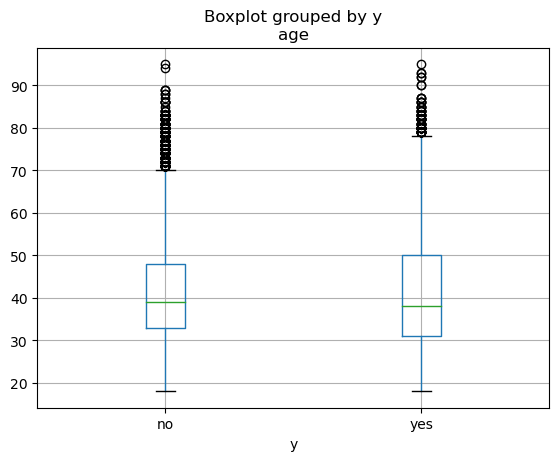

In [17]:
bank.boxplot(column='age',by='y')

Text(0, 0.5, 'Frequency of Subscibe')

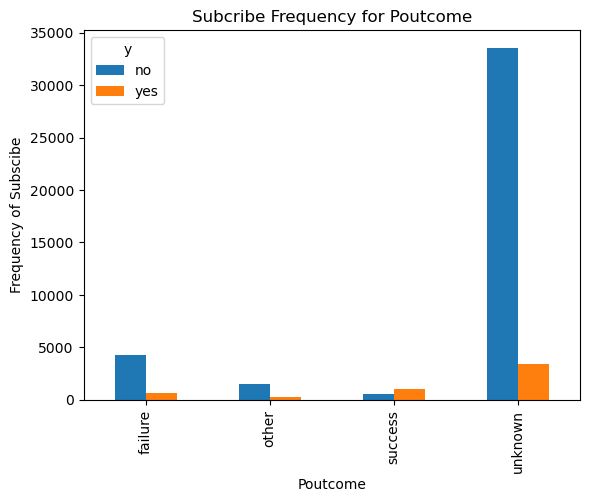

In [16]:
pd.crosstab(bank.poutcome,bank.y).plot(kind='bar')
plt.title('Subcribe Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Subscibe')

### Day means last contact day of the month on the basis of it we can't say client will purchase or not

### Campaign means number of contacts performed during this campaign  and for this client it may be baised & depend on client to client it is not important feature

### Pdays means number of days that passed by after the client was last contacted from a previous campaign it same as the campaign feature

In [20]:
target=bank[['y']]
target

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [22]:
features=bank.drop('y',axis=1)
features

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [28]:
features=pd.get_dummies(features,dtype=float)
features

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,29,5,151,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,5,76,1,-1,0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1506,5,92,1,-1,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,5,198,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45207,71,1729,17,456,2,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,72,5715,17,1127,5,184,3,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
45209,57,668,17,508,4,-1,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33908, 51)
(11303, 51)
(33908, 1)
(11303, 1)


In [32]:
log_model=LogisticRegression()

In [40]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_pred=log_model.predict(x_test)

In [42]:
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [44]:
#prediction probability of output
log_model.predict_proba(x_test)

array([[0.9430581 , 0.0569419 ],
       [0.86365042, 0.13634958],
       [0.97695367, 0.02304633],
       ...,
       [0.96261704, 0.03738296],
       [0.95289526, 0.04710474],
       [0.99362321, 0.00637679]])

In [53]:
from sklearn.metrics import accuracy_score
print('accuracy of the model is=',accuracy_score(y_test,y_pred))

accuracy of the model is= 0.8880828098734849
